In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [2]:
df = pd.read_csv('Earthwatch_Data/df_eda.csv')

In [3]:
df.head()

,sample_date,site_name,fw_bodytype,land_use,water_flow,water_level,nitrate,phosphate,latitude,longitude,...,pol_road,watsur_oily,watsur_litter,watsur_foam,watsur_none,watsur_floatalg,bankveg_noveg,bankveg_trees,bankveg_other,bankveg_grass
0,05/11/2019,Shimungalu,River,Agriculture,Slow,Low,0.35,0.150,-15.754000,27.784000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,05/11/2019,Shimungalu,River,Industrial,Slow,Low,0.35,0.075,-15.754000,27.785000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,03/11/2019,borro bucine,Stream,Agriculture,Steady,Average,7.50,0.075,43.646000,11.169000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,03/11/2019,Dawlish Close 2,Stream,Urban Residential,Surging,High,3.50,0.010,52.630478,-1.056443,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,03/11/2019,Abington Ford,River,Agriculture,Slow,Low,12.00,1.200,52.117959,0.239236,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [4]:
df.shape

(16037, 58)

Columns are a combinations of strings and floats (mostly for those that I have created dummy columns for)

In [5]:
df.dtypes

sample_date             object
site_name               object
fw_bodytype             object
land_use                object
water_flow              object
water_level             object
nitrate                float64
phosphate              float64
latitude               float64
longitude              float64
precipIntensityMax     float64
continent               object
country                 object
state                   object
county                  object
city                    object
town                    object
village                 object
city_proxy             float64
town_proxy             float64
village_proxy          float64
other_proxy            float64
water_body_category     object
year                   float64
month                  float64
quarter                float64
algae_evenly           float64
algae_attached         float64
algae_floating         float64
algae_scum             float64
algae_noalg            float64
aqlife_frogs           float64
aqlife_f

## Categorisation of phosphate/ nitrate levels
### Nitrate
- low: < 0.5 mg/L
- medium: 0.5 - 2 mg/L
- high: > 2 mg/L

### Phosphate
- low: < 0.05 mg/L
- medium: 0.05 - 0.1 mg/L
- high: >0.1 mg/L

## Distribution of phosphate/ nitrate levels
- most observations have low levels of nitrate/ phosphate (unbalanced dataset)
- very little correlation between phosphate and nitrate levels

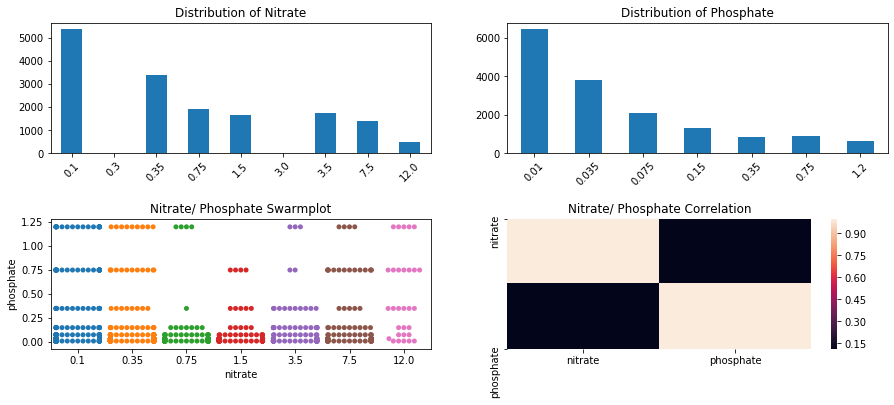

In [6]:
fig, ax = plt.subplots(ncols = 2, nrows = 2, figsize = (15,6))

df.nitrate.value_counts().iloc[:10].sort_index().plot.bar(ax = ax[0,0], title = 'Distribution of Nitrate', rot = 45)
df.phosphate.value_counts().iloc[:10].sort_index().plot.bar(ax = ax[0,1], title = 'Distribution of Phosphate', rot = 45)

sns.swarmplot(x = 'nitrate', y = 'phosphate', data = df.sample(1000), ax = ax[1,0])
sns.heatmap(df.corr()[:2][['nitrate', 'phosphate']], ax = ax[1,1])
ax[1,0].set_title('Nitrate/ Phosphate Swarmplot')
ax[1,1].set_title('Nitrate/ Phosphate Correlation')

plt.subplots_adjust(hspace=0.5);

## Characteristics
look at site characteristics to see whether there is a relationship to phosphate/ nitrate levels
### Freshwater Bodytypes
- phosphate levels higher in rivers and streams
- nitrate levels higher in lakes, wetlands
- ponds have good levels for both nitrates and phosphates

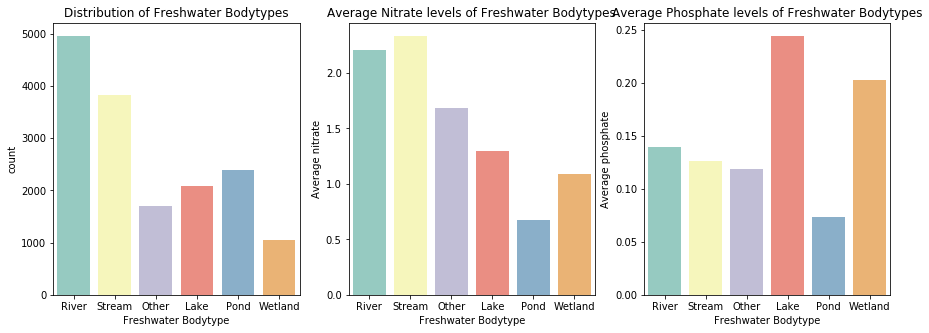

In [7]:
fig, ax = plt.subplots(ncols = 3, figsize = (15,5))
sns.countplot(x='fw_bodytype', data=df, palette="Set3", ax = ax[0])
ax[0].set_title('Distribution of Freshwater Bodytypes')
ax[0].set(xlabel='Freshwater Bodytype')
sns.barplot(x='fw_bodytype', y='nitrate', data=df, palette="Set3", ax = ax[1], ci = None)
ax[1].set_title('Average Nitrate levels of Freshwater Bodytypes')
ax[1].set(xlabel='Freshwater Bodytype', ylabel = 'Average nitrate')
sns.barplot(x='fw_bodytype', y='phosphate', data=df, palette="Set3", ax = ax[2], ci = None)
ax[2].set_title('Average Phosphate levels of Freshwater Bodytypes')
ax[2].set(xlabel='Freshwater Bodytype', ylabel = 'Average phosphate')

plt.show()

### Land Use
- phosphate higher in residential areas (detergents/additives), agriculture (fertilizer)
- nitrate higher with agriculture/ industrial
- agriculture has stronger effect on phosphate levels than nitrate levels (but bad for both)
- grassland/shrub, forest and indicators for low levels of both (BUT low levels of observations)

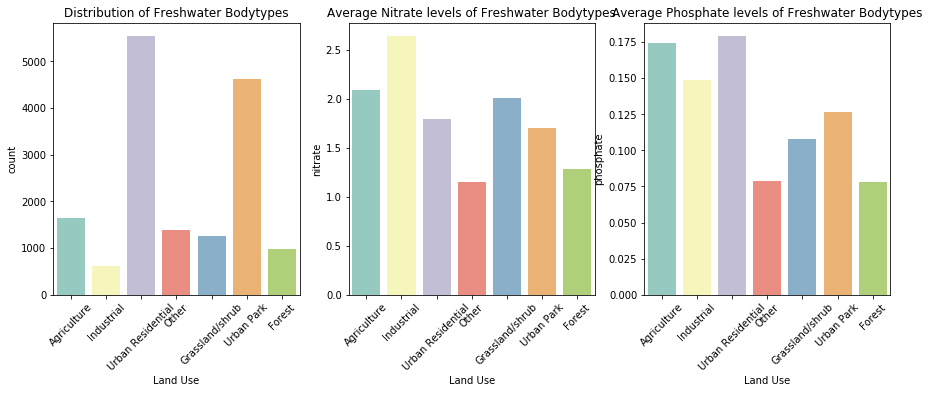

In [8]:
fig, ax = plt.subplots(ncols = 3, figsize = (15,5))
sns.countplot(x='land_use', data=df, palette="Set3", ax = ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
ax[0].set_title('Distribution of Freshwater Bodytypes')
ax[0].set(xlabel='Land Use')
sns.barplot(x='land_use', y='nitrate', data=df, palette="Set3", ax = ax[1], ci = None)
ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
ax[1].set_title('Average Nitrate levels of Freshwater Bodytypes')
ax[1].set(xlabel='Land Use')
sns.barplot(x='land_use', y='phosphate', data=df, palette="Set3", ax = ax[2], ci = None)
ax[2].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
ax[2].set_title('Average Phosphate levels of Freshwater Bodytypes')
ax[2].set(xlabel='Land Use')

plt.show()

### Phosphate: Top polluting body type & land use
- tendency for lakes to have high phosphate levels (stagnant?)
- agriculture/residential (phosphates can be in sewage effluent, agriculture)
- wetland in combination with agriculture - very bad (stagnant water/ fertilizer)
- if water isn't stagnant, then urban residential land use (sewage effluent?)

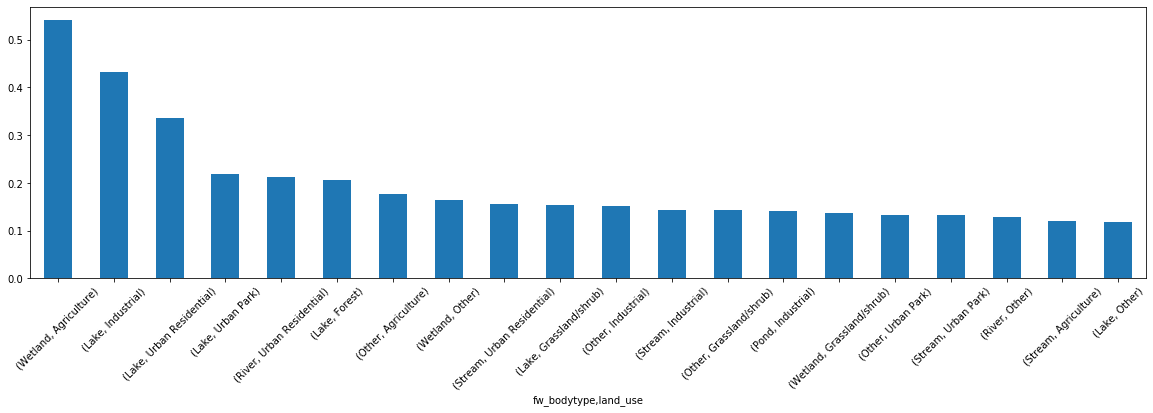

In [9]:
fig, ax = plt.subplots( figsize = (20,5))
df.groupby(['fw_bodytype','land_use'])['phosphate'].mean()\
    .sort_values(ascending = False)[:20].plot.bar(rot=45, ax = ax);

In [10]:
df[(df.fw_bodytype == 'Wetland')].shape

(1049, 58)

In [11]:
#not such a high percentage of wetland and agriculture together
df[(df.fw_bodytype == 'Wetland')&(df.land_use == 'Agriculture')].shape

(235, 58)

### Phosphate: Lowest polluting body type and land use
- pond (even near agriculture!)
- very low levels for pond & forest (near plants)
- fast moving waterbodys (e.g. river) & plants (e.g. forest)

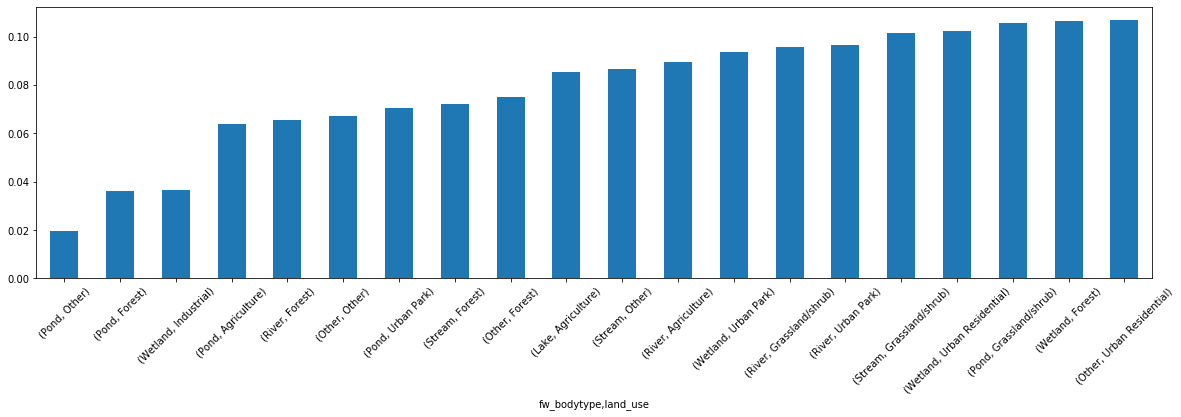

In [12]:
fig, ax = plt.subplots( figsize = (20,5))
df.groupby(['fw_bodytype','land_use'])['phosphate'].mean()\
    .sort_values(ascending = True)[:20].plot.bar(rot=45, ax = ax);

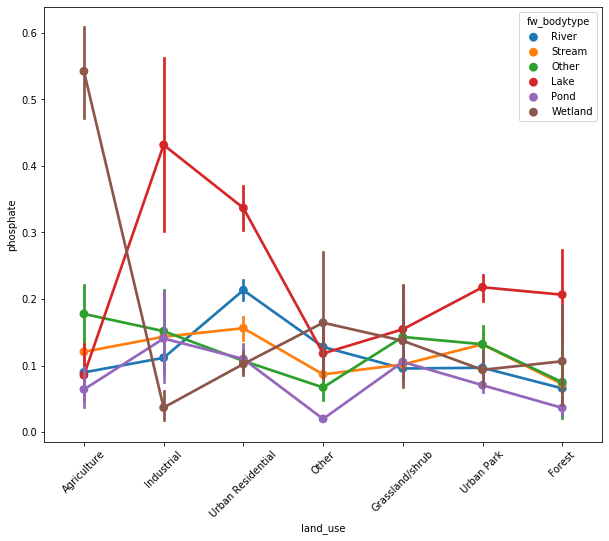

In [13]:
fig, ax = plt.subplots( figsize = (10,8))
sns.catplot(x="land_use", y="phosphate", hue = 'fw_bodytype', data=df, ax=ax, kind = 'point')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.close(2)

### Nitrate: Highest polluting bodytype and land use
- flowing waters have high nitrate levels particularly near industry/ agriculture (nitrates most common in fertilizers)

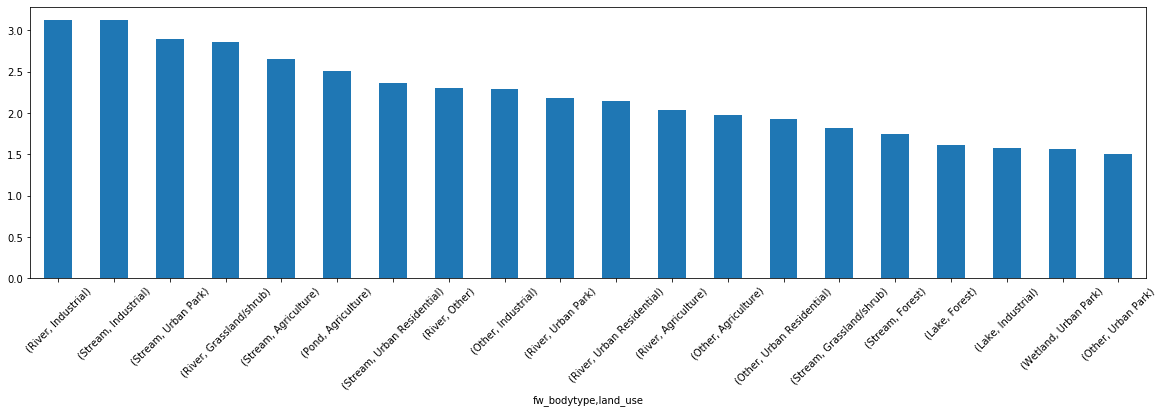

In [14]:
fig, ax = plt.subplots( figsize = (20,5))
df.groupby(['fw_bodytype','land_use'])['nitrate'].mean()\
    .sort_values(ascending = False)[:20].plot.bar(rot=45, ax = ax);

### Nitrate: Lowest polluting bodytype and land use
- stagnant water bodys no matter what land use

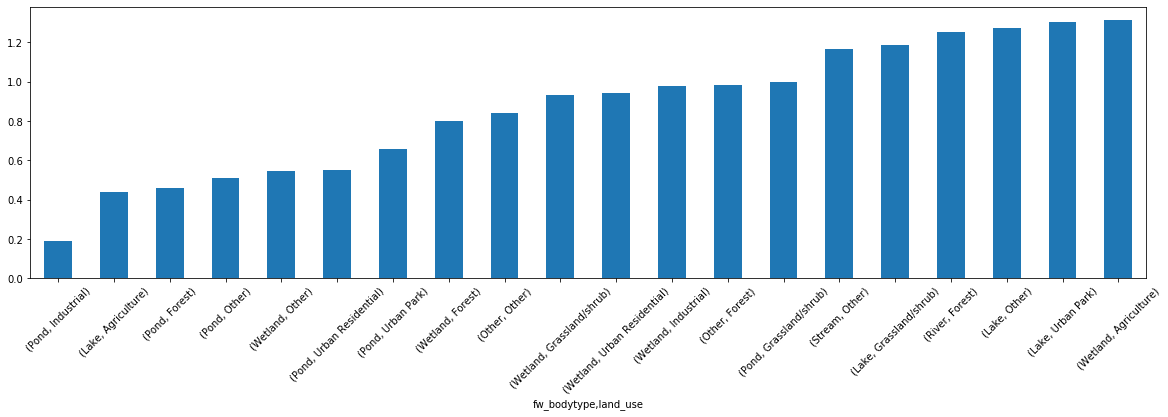

In [15]:
fig, ax = plt.subplots( figsize = (20,5))
df.groupby(['fw_bodytype','land_use'])['nitrate'].mean()\
    .sort_values(ascending = True)[:20].plot.bar(rot=45, ax = ax);

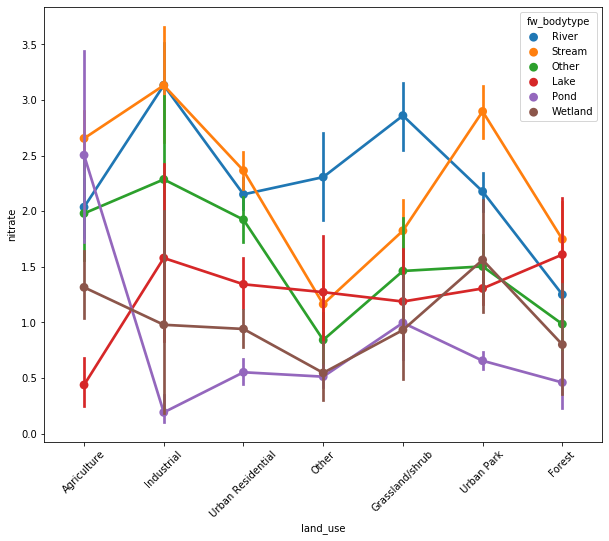

In [16]:
fig, ax = plt.subplots(figsize = (10,8))
sns.catplot(x="land_use", y="nitrate", hue = 'fw_bodytype', data=df, ax = ax, kind = 'point')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.close(2)

### Count of Characteristics
- Most common characteristics: 
    - No algae
    - Fish, plants emerging from water and birds
    - Fishing and boating
    - Road, residential
    - Nothing on water surface
    - Trees and grass

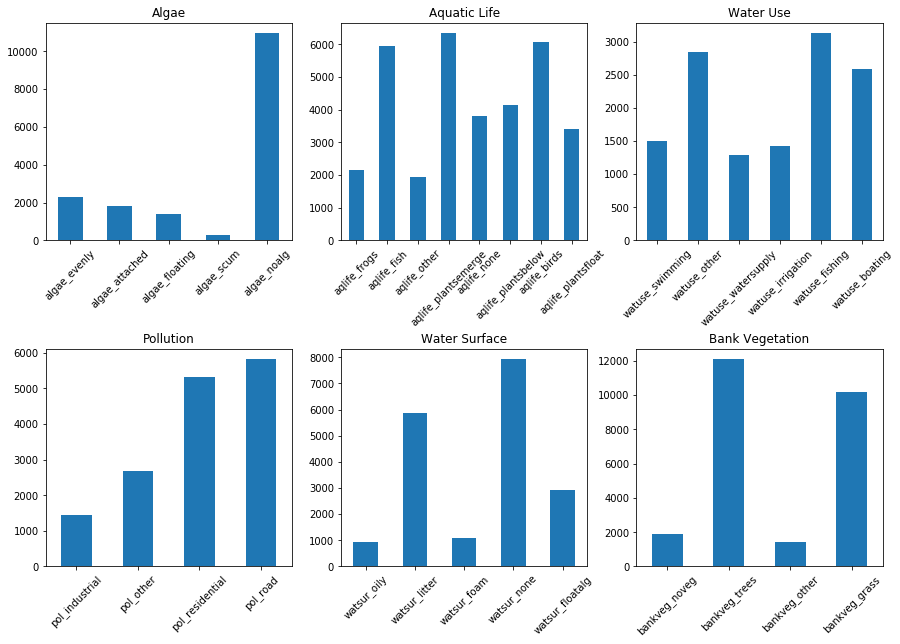

In [17]:
fig, ax = plt.subplots(ncols = 3, nrows=2, figsize = (15,10))

ax1 = df[[col for col in df.columns if 'algae' in col]].sum().plot.bar(ax=ax[0,0], rot=45)
ax2 = df[[col for col in df.columns if 'aqlife' in col]].sum().plot.bar(ax=ax[0,1], rot=45)
ax3 = df[[col for col in df.columns if 'watuse' in col]].sum().plot.bar(ax=ax[0,2], rot=45)
ax4 = df[[col for col in df.columns if 'pol' in col]].sum().plot.bar(ax=ax[1,0], rot=45)
ax5 = df[[col for col in df.columns if 'watsur' in col]].sum().plot.bar(ax=ax[1,1], rot=45)
ax6 = df[[col for col in df.columns if 'bankveg' in col]].sum().plot.bar(ax=ax[1,2], rot=45)

ax1.set_title('Algae')
ax2.set_title('Aquatic Life')
ax3.set_title('Water Use')
ax4.set_title('Pollution')
ax5.set_title('Water Surface')
ax6.set_title('Bank Vegetation')

plt.subplots_adjust(hspace=0.5) 

### Nitrate by characteristics
- most observations have low nitrate levels

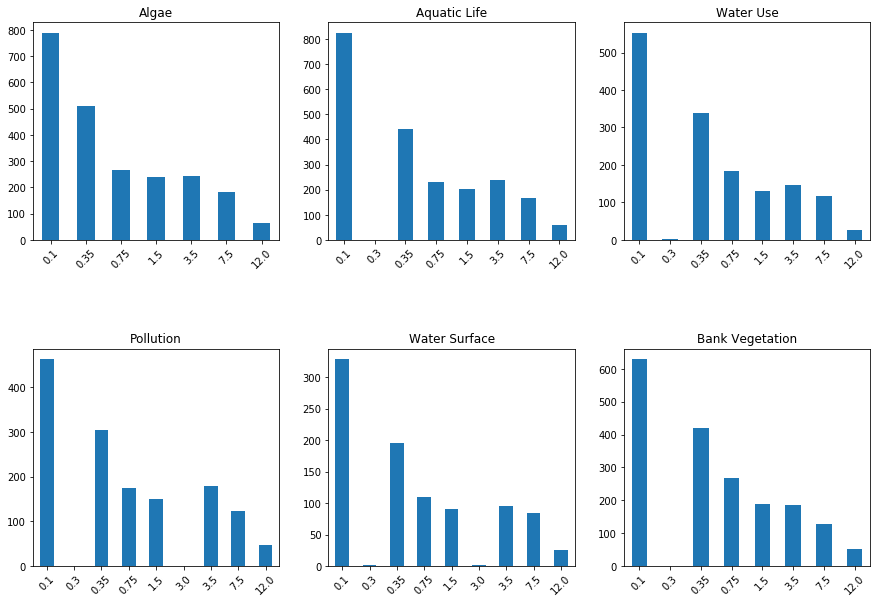

In [18]:
words = ['algae', 'aqlife', 'watuse', 'pol', 'watsur', 'bankveg'] 

def nitrate_func (words):
    """ 
    Function that creates a new df of counts of different nitrate levels for columns with multiple choices
    """
    cols = [col for col in df.columns if words in col]+['nitrate']
    means = []
    for x in cols[:-1]:
        return df[df[x] == 1].nitrate.value_counts()

fig, ax = plt.subplots(ncols = 3, nrows=2, figsize = (15,10))

nitrate_func('algae').sort_index().plot.bar( ax = ax[0,0], rot = 45, title = 'Algae')
nitrate_func('aqlife').sort_index().plot(kind = 'bar', ax = ax[0,1], rot = 45, title = 'Aquatic Life')
nitrate_func('watuse').sort_index().plot(kind = 'bar', ax = ax[0,2], rot = 45, title = 'Water Use')
nitrate_func('pol').sort_index().plot(kind = 'bar', ax = ax[1,0], rot = 45, title = 'Pollution')
nitrate_func('watsur').sort_index().plot(kind = 'bar', ax = ax[1,1], rot = 45, title = 'Water Surface')
nitrate_func('bankveg').sort_index().plot(kind = 'bar', ax = ax[1,2], rot = 45, title = 'Bank Vegetation')

plt.subplots_adjust(hspace=0.5);

plt.show()

#### Mean
- Due to skewed dataset (most obs have low levels) the mean is low
- Higher means:
    - Algae : Attached

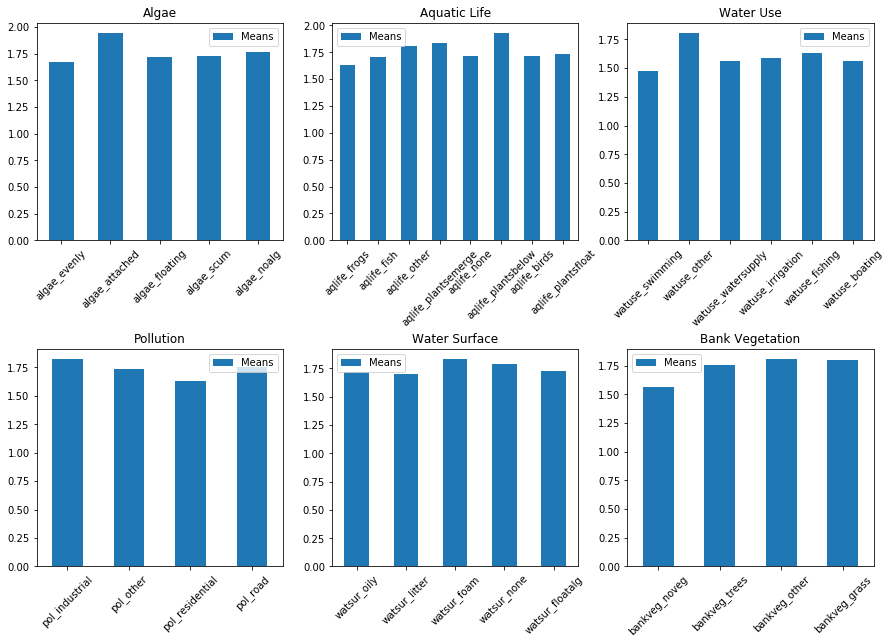

In [19]:
words = ['algae', 'aqlife', 'watuse', 'pol', 'watsur', 'bankveg']

def nitrate_mean (words):
    """ 
    Function that creates a new df of the nitrate mean for columns with multiple choices
    """
    cols = [col for col in df.columns if words in col]+['nitrate']
    means = []
    for x in cols[:-1]:
        means.append(df[df[x] == 1].nitrate.mean())
    dic = {'Means': means}
    return pd.DataFrame(dic, index=cols[:-1]) 

fig, ax = plt.subplots(ncols = 3, nrows=2, figsize = (15,10))

nitrate_mean('algae').plot(kind = 'bar', ax = ax[0,0], rot = 45, title = 'Algae')
nitrate_mean('aqlife').plot(kind = 'bar', ax = ax[0,1], rot = 45, title = 'Aquatic Life')
nitrate_mean('watuse').plot(kind = 'bar', ax = ax[0,2], rot = 45, title = 'Water Use')
nitrate_mean('pol').plot(kind = 'bar', ax = ax[1,0],  rot = 45, title = 'Pollution')
nitrate_mean('watsur').plot(kind = 'bar', ax = ax[1,1], rot = 45, title = 'Water Surface')
nitrate_mean('bankveg').plot(kind = 'bar', ax = ax[1,2], rot = 45, title = 'Bank Vegetation')

plt.subplots_adjust(hspace=0.5);

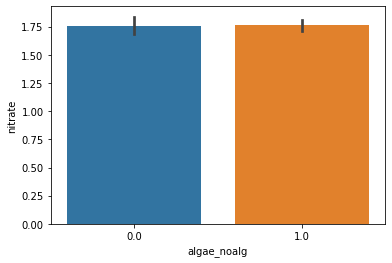

In [20]:
sns.barplot(x = 'algae_noalg', y ='nitrate', data = df);

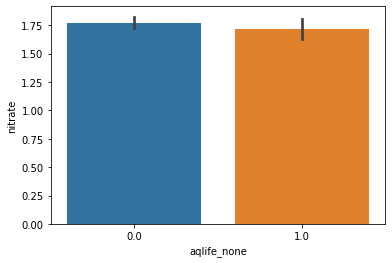

In [21]:
sns.barplot(x = 'aqlife_none', y ='nitrate', data = df);

#### What is the distribution within different categories?
- no clear sign that certain features have a tendency to show higher nitrates rates (maybe floating/ maybe residential/ maybe road)

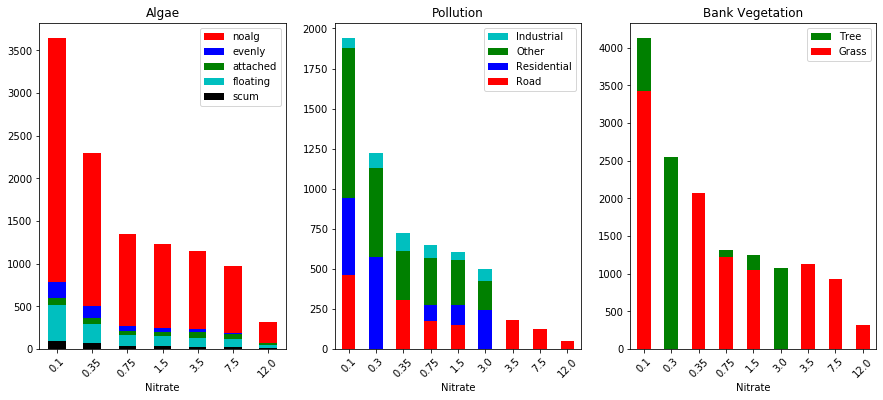

In [22]:
fig, ax = plt.subplots(ncols = 3, figsize = (15,6))

nitrate_func('algae_noalg').plot(kind = 'bar', ax = ax[0], rot = 45, color = 'r')
nitrate_func('algae_evenly').plot(kind = 'bar', ax = ax[0], rot = 45, color = 'b')
nitrate_func('algae_attached').plot(kind = 'bar', ax = ax[0], rot = 45, color = 'g')
nitrate_func('algae_floating').plot(kind = 'bar', ax = ax[0],  rot = 45, color = 'c')
nitrate_func('algae_scum').sort_index().plot(kind = 'bar', ax = ax[0], rot = 45, title = 'Algae', color = 'black')
ax[0].legend(['noalg', "evenly", "attached", "floating", "scum"],loc = 1)
ax[0].set(xlabel='Nitrate')

nitrate_func('pol_road').plot(kind = 'bar', ax = ax[1], rot = 45, stacked = False, color = 'c')
nitrate_func('pol_residential').plot(kind = 'bar', ax = ax[1], rot = 45, color = 'g')
nitrate_func('pol_other').plot(kind = 'bar', ax = ax[1], rot = 45, color = 'b')
nitrate_func('pol_industrial').sort_index().plot(kind = 'bar', ax = ax[1],  rot = 45, color = 'r', title = 'Pollution')
ax[1].legend(['Industrial', "Other", "Residential", "Road"],loc = 1)
ax[1].set(xlabel='Nitrate')

nitrate_func('bankveg_trees').plot(kind = 'bar', ax = ax[2], rot = 45, color = 'g')
nitrate_func('bankveg_grass').sort_index().plot(kind = 'bar', ax = ax[2],  rot = 45, color = 'r', title = 'Bank Vegetation')
#nitrate_func('bankveg_noveg').plot(kind = 'bar', ax = ax[2], rot = 45, color = 'c')
#nitrate_func('bankveg_other').sort_index().plot(kind = 'bar', ax = ax[2], rot = 45, color = 'b')
ax[2].legend(['Tree', "Grass", "Noveg", "Other"],loc = 1)
ax[2].set(xlabel='Nitrate')

plt.show()

In [23]:
df.columns

Index(['sample_date', 'site_name', 'fw_bodytype', 'land_use', 'water_flow',
       'water_level', 'nitrate', 'phosphate', 'latitude', 'longitude',
       'precipIntensityMax', 'continent', 'country', 'state', 'county', 'city',
       'town', 'village', 'city_proxy', 'town_proxy', 'village_proxy',
       'other_proxy', 'water_body_category', 'year', 'month', 'quarter',
       'algae_evenly', 'algae_attached', 'algae_floating', 'algae_scum',
       'algae_noalg', 'aqlife_frogs', 'aqlife_fish', 'aqlife_other',
       'aqlife_plantsemerge', 'aqlife_none', 'aqlife_plantsbelow',
       'aqlife_birds', 'aqlife_plantsfloat', 'watuse_swimming', 'watuse_other',
       'watuse_watersupply', 'watuse_irrigation', 'watuse_fishing',
       'watuse_boating', 'pol_industrial', 'pol_other', 'pol_residential',
       'pol_road', 'watsur_oily', 'watsur_litter', 'watsur_foam',
       'watsur_none', 'watsur_floatalg', 'bankveg_noveg', 'bankveg_trees',
       'bankveg_other', 'bankveg_grass'],
      dtype='o

In [24]:
df[(df['nitrate'] == 3)& (df['bankveg_trees']==1)]

,sample_date,site_name,fw_bodytype,land_use,water_flow,water_level,nitrate,phosphate,latitude,longitude,...,pol_road,watsur_oily,watsur_litter,watsur_foam,watsur_none,watsur_floatalg,bankveg_noveg,bankveg_trees,bankveg_other,bankveg_grass
12043,13/08/2014,Seacourt Stream - Birdhide,Stream,Agriculture,Steady,Average,3.0,0.15,51.785409,-1.314416,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12044,13/08/2014,Seacourt Stream - Mill,Stream,Agriculture,Steady,Average,3.0,0.15,51.781486,-1.310052,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


### Phosphate by characteristics

In [25]:
#testing stacked bar chart
words = ['algae', 'aqlife', 'watuse', 'pol', 'watsur', 'bankveg']

def phosphate_func (words):
    """ 
    Function that creates a new df of counts of different phosphate levels for columns with multiple choices
    """
    cols = [col for col in df.columns if words in col]+['phosphate']
    means = []
    for x in cols[:-1]:
        return df[df[x] == 1].phosphate.value_counts() 

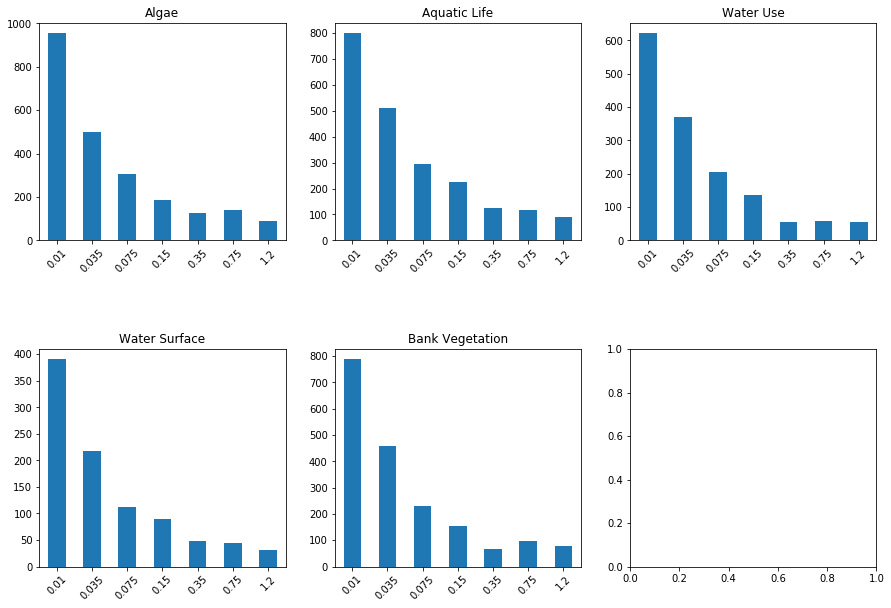

In [26]:
fig, ax = plt.subplots(ncols = 3, nrows=2, figsize = (15,10))

phosphate_func('algae').sort_index().plot(kind = 'bar', ax = ax[0,0], rot = 45, title = 'Algae')
phosphate_func('aqlife').sort_index().plot(kind = 'bar', ax = ax[0,1], rot = 45, title = 'Aquatic Life')
phosphate_func('watuse').sort_index().plot(kind = 'bar', ax = ax[0,2], rot = 45, title = 'Water Use')
phosphate_func('watsur').sort_index().plot(kind = 'bar', ax = ax[1,0], rot = 45, title = 'Water Surface')
phosphate_func('bankveg').sort_index().plot(kind = 'bar', ax = ax[1,1], rot = 45, title = 'Bank Vegetation')

plt.subplots_adjust(hspace=0.5);

#### What is the distribution of different categories?
- Potential characterisitics of higher phosphate levels: 
    - Floating algae
    - Road

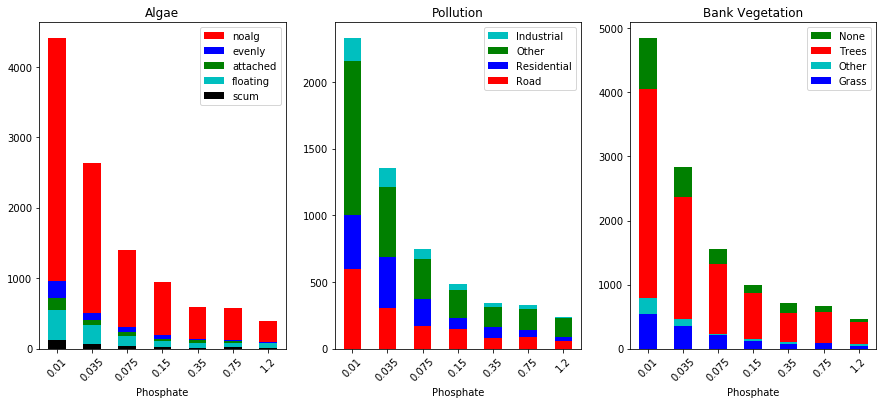

In [27]:
fig, ax = plt.subplots(ncols = 3, figsize = (15,6))

phosphate_func('algae_noalg').plot(kind = 'bar', ax = ax[0], rot = 45, color = 'r')
phosphate_func('algae_evenly').plot(kind = 'bar', ax = ax[0], rot = 45, color = 'b')
phosphate_func('algae_attached').plot(kind = 'bar', ax = ax[0], rot = 45, color = 'g')
phosphate_func('algae_floating').plot(kind = 'bar', ax = ax[0],  rot = 45, color = 'c')
phosphate_func('algae_scum').sort_index().plot(kind = 'bar', ax = ax[0], rot = 45, title = 'Algae', color = 'black')
ax[0].legend(['noalg', "evenly", "attached", "floating", "scum"],loc = 1)
ax[0].set(xlabel='Phosphate')

phosphate_func('pol_road').plot(kind = 'bar', ax = ax[1], rot = 45, stacked = False, color = 'c')
phosphate_func('pol_residential').plot(kind = 'bar', ax = ax[1], rot = 45, color = 'g')
phosphate_func('pol_other').plot(kind = 'bar', ax = ax[1], rot = 45, color = 'b')
phosphate_func('pol_industrial').sort_index().plot(kind = 'bar', ax = ax[1],  rot = 45, color = 'r', title = 'Pollution')
ax[1].legend(['Industrial', "Other", "Residential", "Road"],loc = 1)
ax[1].set(xlabel='Phosphate')

phosphate_func('bankveg_trees').plot(kind = 'bar', ax = ax[2], rot = 45, color = 'g')
phosphate_func('bankveg_grass').sort_index().plot(kind = 'bar', ax = ax[2],  rot = 45, color = 'r', title = 'Bank Vegetation')
phosphate_func('bankveg_noveg').plot(kind = 'bar', ax = ax[2], rot = 45, color = 'c')
phosphate_func('bankveg_other').sort_index().plot(kind = 'bar', ax = ax[2], rot = 45, color = 'b')
ax[2].legend(['None', "Trees", "Other", "Grass"],loc = 1)
ax[2].set(xlabel='Phosphate')

plt.show()

#### Mean distribution
- Due to skewed data (most observations have low levels of nitrate), the mean is similar across categories
- Higher means: 
    - Algae: Floating algae
    - Water surface: Floating algae
    - Water use: irrigation

In [28]:
words = ['algae', 'aqlife', 'watuse', 'pol', 'watsur', 'bankveg']

def phosphate_mean (words):
    """ 
    Function that creates a new df of the phosphate mean for columns with multiple choices
    """
    cols = [col for col in df.columns if words in col]+['phosphate']
    means = []
    for x in cols[:-1]:
        means.append(df[df[x] == 1].phosphate.mean())
    dic = {'Means': means}
    return pd.DataFrame(dic, index=cols[:-1]) 

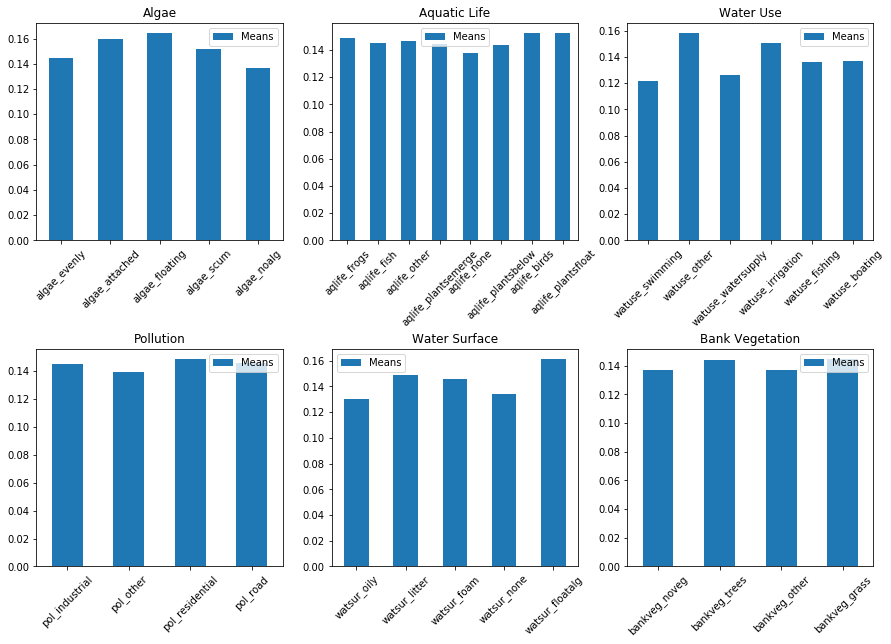

In [29]:
fig, ax = plt.subplots(ncols = 3, nrows=2, figsize = (15,10))

phosphate_mean('algae').plot(kind = 'bar', ax = ax[0,0], rot = 45, title = 'Algae')
phosphate_mean('aqlife').plot(kind = 'bar', ax = ax[0,1], rot = 45, title = 'Aquatic Life')
phosphate_mean('watuse').plot(kind = 'bar', ax = ax[0,2], rot = 45, title = 'Water Use')
phosphate_mean('pol').plot(kind = 'bar', ax = ax[1,0],  rot = 45, title = 'Pollution')
phosphate_mean('watsur').plot(kind = 'bar', ax = ax[1,1], rot = 45, title = 'Water Surface')
phosphate_mean('bankveg').plot(kind = 'bar', ax = ax[1,2], rot = 45, title = 'Bank Vegetation')

plt.subplots_adjust(hspace=0.5);

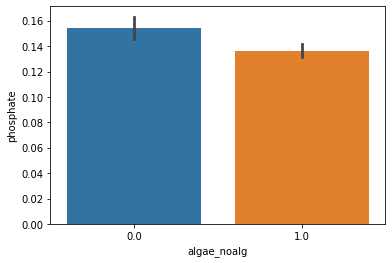

In [30]:
sns.barplot(x = 'algae_noalg', y ='phosphate', data = df);

## Observations over time

In [31]:
df['sample_date'] = pd.to_datetime(df.sample_date, format = '%d/%m/%Y')

- big change in observation count over the years
- highest average nitrate levels in 2017 (few observations)
- highest average phosphate levels in 2015 (many observations)

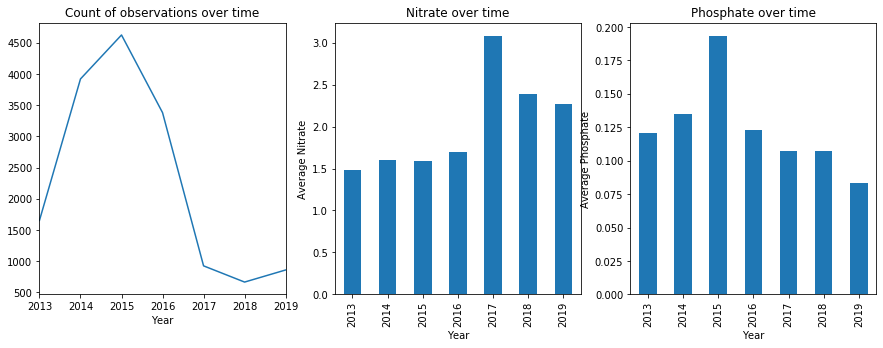

In [32]:
fig, ax = plt.subplots(ncols = 3, figsize = (15, 5))
ax1 = df.sample_date.groupby(df["sample_date"].dt.year).count().plot(kind='line', ax=ax[0])
ax1.set_title('Count of observations over time')
ax1.set(xlabel='Year')
ax2 = df.nitrate.groupby(df["sample_date"].dt.year).mean().plot(kind="bar", ax=ax[1])
ax2.set_title('Nitrate over time')
ax2.set(xlabel='Year', ylabel = 'Average Nitrate')
ax3 = df.phosphate.groupby(df["sample_date"].dt.year).mean().plot(kind="bar", ax=ax[2])
ax3.set_title('Phosphate over time')
ax3.set(xlabel='Year', ylabel = "Average Phosphate");

### most high nitrate observations were in the UK...

In [33]:
## look into which countries had high nitrate in 2017
df[(df['year'] == 2017) & (df['nitrate'] > 2)][['nitrate','country']].sort_values('nitrate', ascending = False).country.value_counts()

United Kingdom    310
China              17
Mauritius          17
Italy               9
Argentina           8
Sweden              3
Canada              2
Brazil              1
USA                 1
Name: country, dtype: int64

### ...but most low observations were also in the UK

In [34]:
## look into which countries had high nitrate in 2017
df[(df['year'] == 2017) & (df['nitrate'] <2 )][['nitrate','country']].sort_values('nitrate', ascending = False).country.value_counts()

United Kingdom          263
China                    46
Argentina                41
Netherlands              38
Italy                    37
Mauritius                33
Nigeria                  29
Brazil                   23
USA                      14
Sweden                   11
Canada                   10
India                     4
United Arab Emirates      4
Belgium                   3
Norway                    1
Algeria                   1
Name: country, dtype: int64

### ...same goes for phosphate

In [35]:
df[(df['year'] == 2017) & (df['phosphate'] > 0.1)][['phosphate','country']].sort_values('phosphate', ascending = False).country.value_counts()

United Kingdom    128
Argentina          42
China               9
Mauritius           8
Italy               5
Sweden              1
India               1
Canada              1
Netherlands         1
Nigeria             1
Name: country, dtype: int64

### ...same goes for phosphate

In [36]:
df[(df['year'] == 2017) & (df['phosphate'] < 0.1)][['phosphate','country']].sort_values('phosphate', ascending = False).country.value_counts()

United Kingdom          445
China                    54
Mauritius                42
Italy                    41
Netherlands              37
Nigeria                  28
Brazil                   24
USA                      15
Sweden                   13
Canada                   11
Argentina                 7
United Arab Emirates      4
India                     3
Belgium                   3
Norway                    1
Algeria                   1
Name: country, dtype: int64

### Observations by month
- perhaps nitrate is lower in summer and phophate is lower in winter?
- ...accounting for fact that samples include both northern and southern hemisphere

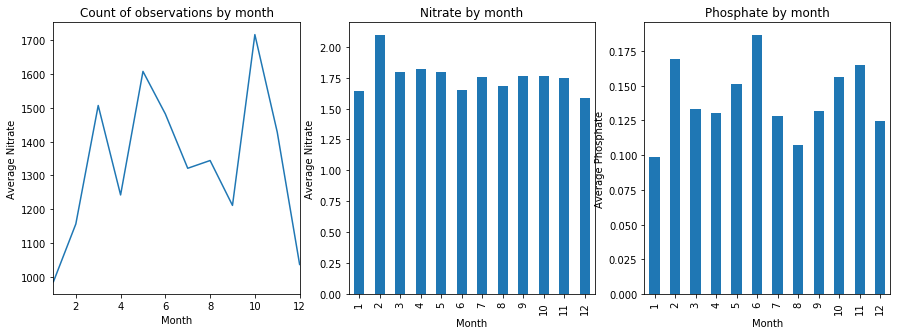

In [37]:
fig,ax = plt.subplots(ncols = 3, figsize = (15,5))
df.sample_date.groupby(df["sample_date"].dt.month).count().plot(kind='line', ax=ax[0])
ax[0].set(xlabel = 'Month', ylabel = 'Average Nitrate')
ax[0].set_title ('Count of observations by month')
df.nitrate.groupby(df["sample_date"].dt.month).mean().plot(kind='bar', ax=ax[1])
ax[1].set(xlabel = 'Month', ylabel = 'Average Nitrate')
ax[1].set_title ('Nitrate by month')
df.phosphate.groupby(df["sample_date"].dt.month).mean().plot(kind='bar', ax=ax[2])
ax[2].set(xlabel = 'Month', ylabel = 'Average Phosphate')
ax[2].set_title ('Phosphate by month');

In [38]:
#add column to distinguish between north and south
df_north = df[df['latitude']>0]

### Northern hemisphere:  No clear trend

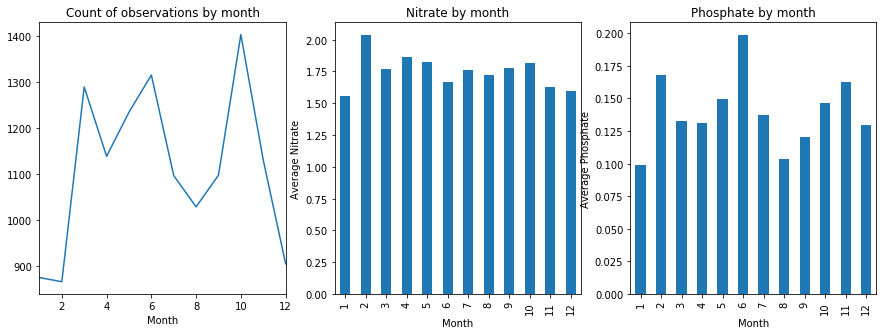

In [39]:
#count of observations per month (northern hemisphere)
fig,ax = plt.subplots(ncols = 3, figsize = (15,5))
df_north.phosphate.groupby(df_north["sample_date"].dt.month).count().plot(kind='line', ax=ax[0])
ax[0].set(xlabel = 'Month')
ax[0].set_title ('Count of observations by month');
df_north.nitrate.groupby(df_north["sample_date"].dt.month).mean().plot(kind='bar', ax=ax[1])
ax[1].set(xlabel = 'Month', ylabel = 'Average Nitrate')
ax[1].set_title ('Nitrate by month');
df_north.phosphate.groupby(df_north["sample_date"].dt.month).mean().plot(kind='bar', ax=ax[2])
ax[2].set(xlabel = 'Month', ylabel = 'Average Phosphate')
ax[2].set_title ('Phosphate by month');

In [40]:
df_south = df[df['latitude']<0]

### Southern hemisphere: No clear trend


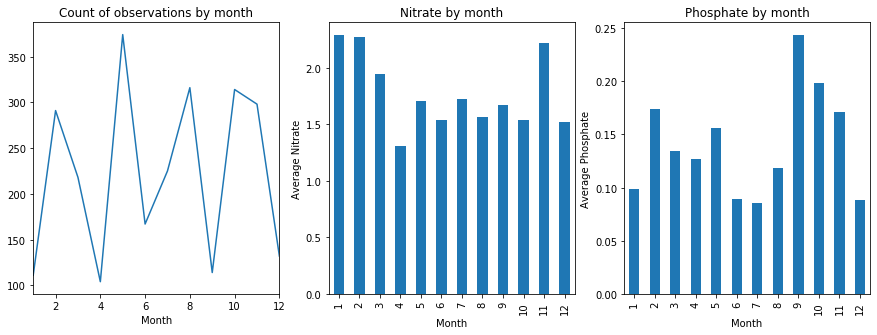

In [41]:
#count of observations per month (southern)
fig,ax = plt.subplots(ncols=3, figsize=(15,5))
df_south.sample_date.groupby(df_south["sample_date"].dt.month).count().plot(kind='line', ax=ax[0])
ax[0].set(xlabel = 'Month')
ax[0].set_title ('Count of observations by month');
df_south.nitrate.groupby(df_south["sample_date"].dt.month).mean().plot(kind='bar', ax=ax[1])
ax[1].set(xlabel = 'Month', ylabel = 'Average Nitrate')
ax[1].set_title ('Nitrate by month');
df_south.phosphate.groupby(df_south["sample_date"].dt.month).mean().plot(kind='bar', ax=ax[2])
ax[2].set(xlabel = 'Month', ylabel = 'Average Phosphate')
ax[2].set_title ('Phosphate by month');

## Precipitation

In [42]:
df_date_index = df.set_index('sample_date', drop=True)

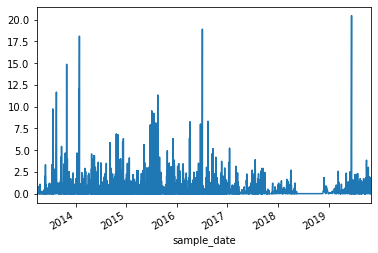

In [43]:
df_date_index.precipIntensityMax.plot();

In [44]:
df_date_index.precipIntensityMax.describe()

count    16037.000000
mean         0.202483
std          0.785963
min          0.000000
25%          0.000000
50%          0.000000
75%          0.012800
max         20.450000
Name: precipIntensityMax, dtype: float64

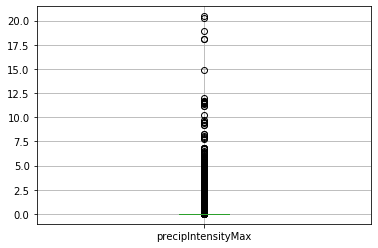

In [45]:
# all are outliers
df_date_index.boxplot('precipIntensityMax');

### Most days it doesn't rain

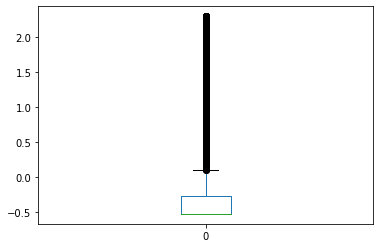

In [46]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
pd.DataFrame(pt.fit_transform(df[['precipIntensityMax']])).plot(kind = 'box');

more rain, lower nitrate - NOT as expected

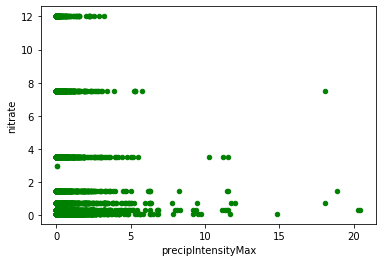

In [47]:
fig, ax = plt.subplots(facecolor='white')
df.plot.scatter('precipIntensityMax', 'nitrate',ax = ax, color = 'green')
ax.grid(False)

more rain, lower phosphate - NOT as expected

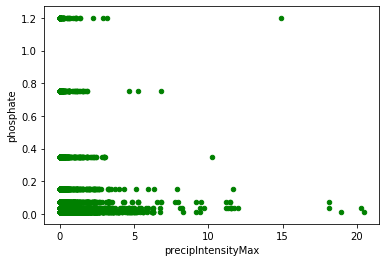

In [48]:
fig, ax = plt.subplots(facecolor='white')
df.plot.scatter('precipIntensityMax', 'phosphate',ax = ax, color = 'green')
ax.grid(False)

no correlation between higher nitrate and phosphate and higher precip intensity

In [49]:
df.corr()['precipIntensityMax'][:2]

nitrate     -0.01801
phosphate   -0.06003
Name: precipIntensityMax, dtype: float64

## Geolocations

### By Continent
- Nitrate levels are high in Europe and South America (Note: few observations in South America)
- Phosphate levels are high in South America, North America and Asia

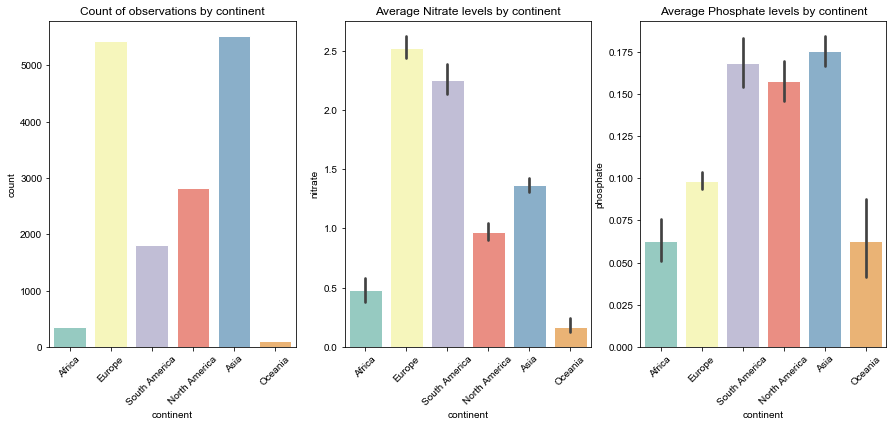

In [50]:
fig, ax = plt.subplots(ncols = 3, figsize = (15,6))
sns.set(style="darkgrid")
sns.countplot(x='continent', data=df, palette="Set3", ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
ax[0].set_title('Count of observations by continent')
sns.barplot(x='continent', y='nitrate', data=df, palette="Set3", ax = ax[1])
ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
ax[1].set_title('Average Nitrate levels by continent')
sns.barplot(x='continent', y='phosphate', data=df, palette="Set3", ax = ax[2])
ax[2].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
ax[2].set_title('Average Phosphate levels by continent');

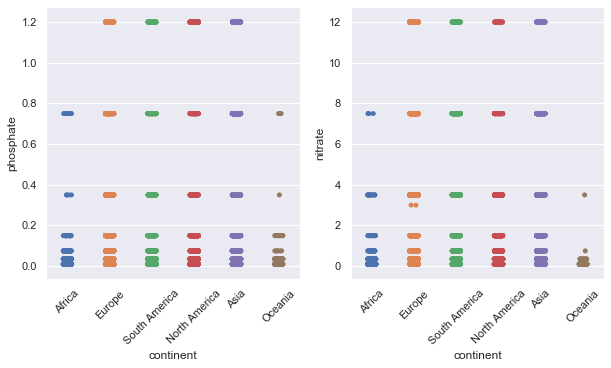

In [51]:
fig, ax = plt.subplots(ncols = 2, figsize = (10,5))
sns.catplot(x="continent", y="phosphate", data=df, ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
plt.close(2)
sns.catplot(x="continent", y="nitrate", data=df, ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
plt.close(2)

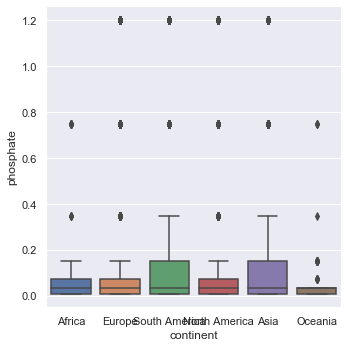

In [52]:
sns.catplot(x="continent", y="phosphate",  kind="box", data=df);

- High proportion of observations with high nitrate in South America and Europe
- High proportion of observations with high phosphate in Asia

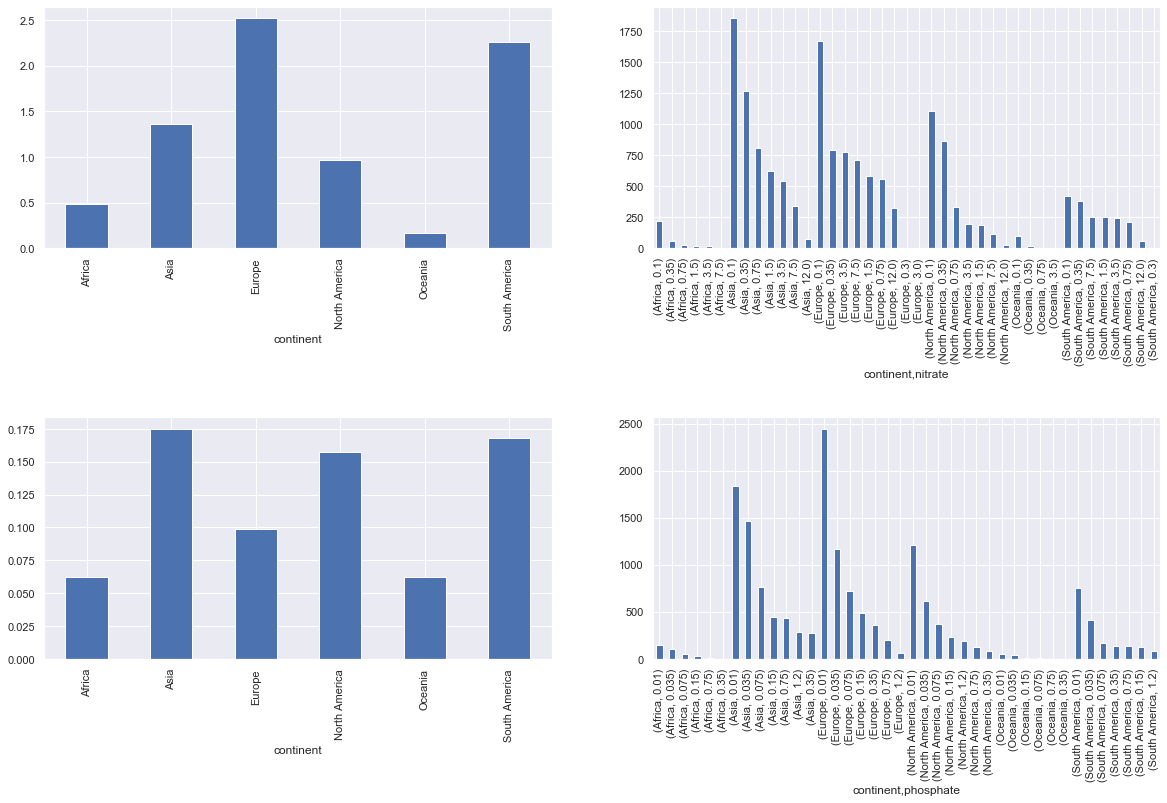

In [53]:
fig, ax = plt.subplots(ncols = 2, nrows = 2, figsize = (20,12))

df.groupby('continent')['nitrate'].mean().plot(kind='bar', ax = ax[0,0])
df.groupby('continent')['nitrate'].value_counts().plot(kind='bar', ax = ax[0,1])

df.groupby('continent')['phosphate'].mean().plot(kind='bar', ax = ax[1,0])
df.groupby('continent')['phosphate'].value_counts().plot(kind='bar', ax = ax[1,1])

plt.subplots_adjust(hspace=0.7);

### plot countries/ locations with highest percentage of high levels vs amount of samples taken
want to look at number of samples taken per site with high nitrate levels, the divide that by total samples, then sort by the top 10 sites/ also sort by lowest 10 sites

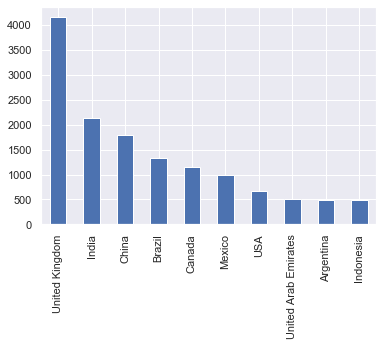

In [54]:
#most observations are taken in the UK
df.country.value_counts().iloc[:10].plot.bar();

### Countries with highest and lowest levels
- not that trustworthy since we don't know how many observations were taken from each

In [55]:
#filter for countries with highest/ lowest means for phosphate/ nitrate
phosphate_high = df.groupby('country')[['phosphate']].mean().reset_index().sort_values('phosphate', ascending = False)[:10]['country']
phosphate_low = df.groupby('country')[['phosphate']].mean().reset_index().sort_values('phosphate', ascending = True)[:10]['country']
nitrate_high = df.groupby('country')[['nitrate']].mean().reset_index().sort_values('nitrate', ascending = False)[:10]['country']
nitrate_low = df.groupby('country')[['nitrate']].mean().reset_index().sort_values('nitrate', ascending = True)[:10]['country']

In [56]:
#create list of countries to plot
phosphate_high_list = df[df.country.isin(phosphate_high.tolist())]
phosphate_low_list = df[df.country.isin(phosphate_low.tolist())]
nitrate_high_list = df[df.country.isin(nitrate_high.tolist())]
nitrate_low_list = df[df.country.isin(nitrate_low.tolist())]

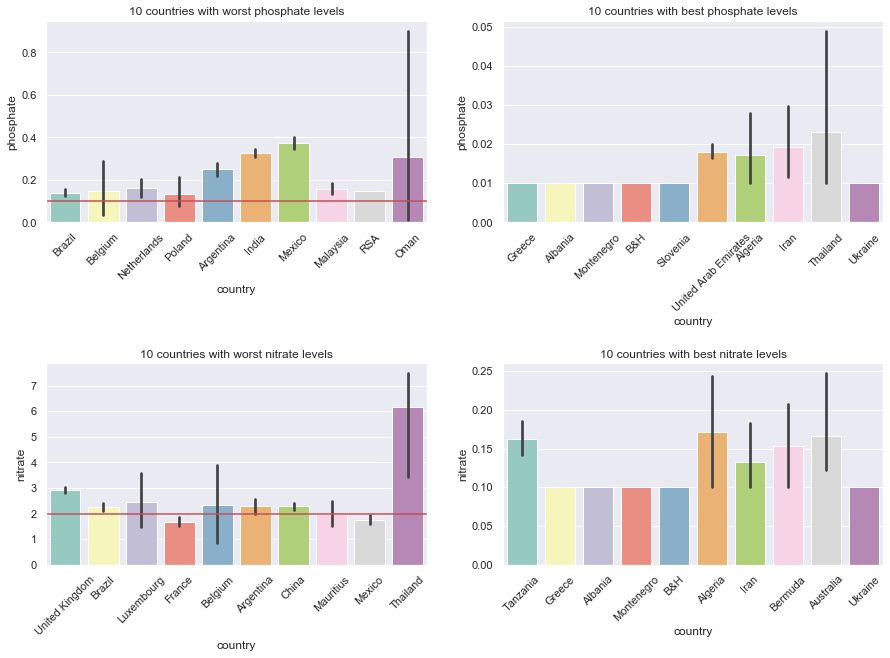

In [57]:
fig, ax = plt.subplots(ncols = 2, nrows = 2, figsize = (15,10))

sns.barplot(x='country', y='phosphate', palette = 'Set3', data=phosphate_high_list, ax = ax[0,0])

sns.barplot(x='country', y='phosphate', palette = 'Set3', data=phosphate_low_list, ax = ax[0,1])
sns.barplot(x='country', y='nitrate', palette = 'Set3', data=nitrate_high_list, ax = ax[1,0])
sns.barplot(x='country', y='nitrate', palette = 'Set3', data=nitrate_low_list, ax = ax[1,1])

ax[1,0].axhline(y=2, color='r', linestyle='-')
ax[0,0].axhline(y=0.1, color='r', linestyle='-')
ax[0,0].set_title('10 countries with worst phosphate levels')
ax[0,1].set_title('10 countries with best phosphate levels')
ax[1,0].set_title('10 countries with worst nitrate levels')
ax[1,1].set_title('10 countries with best nitrate levels')

ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation=45)
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=45)
ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=45)
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=45)

plt.subplots_adjust(hspace=0.7);

plt.show()

In [58]:
#group sites together by rounding the geolocations
df['latitude_round'] = df.latitude.round(2).astype(str)
df['longitude_round'] = df.longitude.round(2).astype(str)

df['geolocation_new'] = df['latitude_round'] + ', ' + df['longitude_round']

In [59]:
#observations with high levels
df[df['nitrate']>2]['geolocation_new'].value_counts()

51.43, -0.25      118
51.77, -1.27       82
19.28, -99.18      65
48.87, 2.24        60
22.55, 88.41       58
                 ... 
53.14, -2.95        1
51.4, -0.27         1
20.51, -103.62      1
51.83, -1.4         1
51.35, -2.33        1
Name: geolocation_new, Length: 998, dtype: int64

In [60]:
#total amount of observations
df['geolocation_new'].value_counts(0)

22.55, 88.41    323
25.4, 56.27     261
51.77, -1.27    253
22.56, 88.42    240
48.87, 2.24     184
               ... 
43.5, 11.11       1
31.13, 121.3      1
51.56, 0.01       1
51.42, 0.1        1
45.64, 10.03      1
Name: geolocation_new, Length: 2747, dtype: int64

In [61]:
df.groupby('geolocation_new')[['phosphate']].max().sort_values('phosphate', ascending = False)

,phosphate
geolocation_new,
"17.32, 78.44",1.20
"17.5, 78.39",1.20
"17.46, 78.54",1.20
"17.46, 78.55",1.20
"17.47, 78.49",1.20
...,...
"35.8, -78.62",0.01
"35.79, -78.63",0.01
"35.77, -78.64",0.01


In [62]:
df.groupby(['year','continent'])[['phosphate', 'nitrate']].agg({'mean':np.mean,
                                                               'max': np.max,
                                                                'min': np.min
                                                               })

/Users/claudiadahinten/opt/anaconda3/lib/python3.7/site-packages/pandas/core/groupby/generic.py:1455: FutureWarning: using a dict with renaming is deprecated and will be removed
in a future version.

For column-specific groupby renaming, use named aggregation

    >>> df.groupby(...).agg(name=('column', aggfunc))

  return super().aggregate(arg, *args, **kwargs)


mean                 max               min        
                     phosphate   nitrate phosphate nitrate phosphate nitrate
year   continent                                                            
2013.0 Asia           0.126500  1.534545     1.200   12.00      0.01     0.1
       Europe         0.095876  1.858505     0.750   12.00      0.01     0.1
       North America  0.107989  0.751928     1.200   12.00      0.01     0.1
       Oceania        0.106562  0.120833     0.750    0.35      0.01     0.1
       South America  0.157656  2.003770     1.200   12.00      0.01     0.1
2014.0 Africa         0.010000  0.100000     0.010    0.10      0.01     0.1
       Asia           0.122564  1.540474     1.200   12.00      0.01     0.1
       Europe         0.094526  1.966191     1.200   12.00      0.01     0.1
       North America  0.171601  1.060721     1.200   12.00      0.01     0.1
       Oceania        0.037738  0.232143     0.350    3.50      0.01     0.1
       South America  0.174012  2.299900     1.200   12.00      0.01     0.1
2015.0 Africa         0.025000  0.150000     0.035    0.35      0.01     0.1
       Asia           0.250022  1.296013     1.200   12.00      0.01     0.1
       Europe         0.134669  2.318684     1.200   12.00      0.01     0.1
       North America  0.161402  0.798508     1.200   12.00      0.01     0.1
       Oceania        0.016522  0.143478     0.035    0.35      0.01     0.1
       South America  0.162009  2.468108     1.200   12.00      0.01     0.1
2016.0 Africa         0.022959  0.284694     0.150    1.50      0.01     0.1
       Asia           0.140441  1.211356     1.200   12.00      0.01     0.1
       Europe         0.085434  2.493443     1.200   12.00      0.01     0.1
       North America  0.165781  1.219368     1.200   12.00      0.01     0.1
       South America  0.106246  2.468259     1.200   12.00      0.01     0.1
2017.0 Africa         0.051937  1.378750     0.750    7.50      0.01     0.1
       Asia           0.082042  1.907746     1.200    7.50      0.01     0.1
       Europe         0.099852  3.707630     1.200   12.00      0.01     0.1
       North America  0.019444  0.957407     0.150    7.50      0.01     0.1
       South America  0.288562  1.121233     1.200    7.50      0.01     0.1
2018.0 Africa         0.132222  0.164815     0.750    0.35      0.01     0.1
       Europe         0.068095  2.512963     1.200   12.00      0.01     0.1
       North America  0.131562  0.928125     0.350    7.50      0.01     0.1
       South America  0.485804  2.644643     1.200   12.00      0.01     0.1
2019.0 Africa         0.070138  0.203039     0.750    3.50      0.01     0.1
       Europe         0.089961  2.952167     1.200   12.00      0.01     0.1
       North America  0.010000  0.100000     0.010    0.10      0.01     0.1
       South America  0.031613  0.196774     0.075    0.35      0.01     0.1

## Sites

### Many of the same sites have different phosphate/ nitrate levels
- 48.87, 2.24
    - 154 observations above 1mg/L
    - 184 total observations
    - 5 different values (0.35 - 7.5 mg/L)
- explanation is therefore not limited to my variables (e.g. weather, crisis etc)

In [63]:
df[df['nitrate']>1]['geolocation_new'].value_counts()

48.87, 2.24       154
51.43, -0.25      118
22.55, 88.41      100
51.77, -1.27       97
19.28, -99.18      67
                 ... 
49.18, -2.22        1
53.28, -2.52        1
49.29, -122.73      1
52.16, 1.06         1
51.39, -2.34        1
Name: geolocation_new, Length: 1288, dtype: int64

In [64]:
#site with most frequent observations
max_df = df[df['geolocation_new'] == '48.87, 2.24']
max_df

,sample_date,site_name,fw_bodytype,land_use,water_flow,water_level,nitrate,phosphate,latitude,longitude,...,watsur_foam,watsur_none,watsur_floatalg,bankveg_noveg,bankveg_trees,bankveg_other,bankveg_grass,latitude_round,longitude_round,geolocation_new
3273,2016-08-26,Etang de Longchamp,Pond,Urban Park,Still,Average,1.50,0.035,48.865773,2.240015,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,48.87,2.24,"48.87, 2.24"
4467,2016-04-14,Etang de Longchamp,Pond,Urban Park,Still,Average,0.75,0.010,48.865773,2.240015,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,48.87,2.24,"48.87, 2.24"
4468,2016-04-14,Etang de Longchamp,Pond,Urban Park,Still,High,1.50,0.010,48.865773,2.240015,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,48.87,2.24,"48.87, 2.24"
4469,2016-04-14,Etang de Longchamp,Pond,Urban Park,Still,Average,3.50,0.010,48.865773,2.240015,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,48.87,2.24,"48.87, 2.24"
4470,2016-04-14,Etang de Longchamp,Pond,Urban Park,Still,High,3.50,0.075,48.865773,2.240015,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,48.87,2.24,"48.87, 2.24"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15998,2013-04-16,Etang de Longchamp,Other,Urban Park,Still,Average,1.50,0.075,48.865928,2.240050,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,48.87,2.24,"48.87, 2.24"
15999,2013-04-16,Etang de Longchamp,Other,Urban Park,Still,Average,3.50,0.010,48.865928,2.240050,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,48.87,2.24,"48.87, 2.24"
16000,2013-04-16,Etang de Longchamp,Other,Urban Park,Still,High,3.50,0.035,48.865928,2.240050,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,48.87,2.24,"48.87, 2.24"
16001,2013-04-16,Etang de Longchamp,Other,Urban Park,Still,Average,1.50,0.075,48.865928,2.240050,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,48.87,2.24,"48.87, 2.24"


In [65]:
max_df['nitrate'].unique()

array([1.5 , 0.75, 3.5 , 0.35, 7.5 ])

In [66]:
max_df.shape

(184, 61)

In [67]:
columns = ['site_name', 'fw_bodytype', 'land_use', 'water_flow', 'water_level', 'continent', 'country', 'month']
for column in max_df[columns]:
    nitrate = max_df[column].mode()
   
    print(column, ':', nitrate[0])

site_name : Route des Moulins
fw_bodytype : Pond
land_use : Urban Park
water_flow : Still
water_level : Average
continent : Europe
country : France
month : 10.0


In [68]:
df[df['phosphate']>0.05]['geolocation_new'].value_counts()

18.54, 73.89    172
22.55, 88.41    128
51.43, -0.25     97
18.53, 73.79     85
51.77, -1.27     83
               ... 
22.34, 88.27      1
53.22, -0.6       1
54.29, -1.91      1
50.93, -1.4       1
51.48, 0.15       1
Name: geolocation_new, Length: 1450, dtype: int64

In [69]:
max_df = df[df['geolocation_new'] == '18.54, 73.89']
columns = ['site_name', 'fw_bodytype', 'land_use', 'water_flow', 'water_level', 'continent', 'country', 'month']
for column in max_df[columns]:
    nitrate = max_df[column].mode()
   
    print(column, ':', nitrate[0])

site_name : mula mutha bird sanctuary site III
fw_bodytype : River
land_use : Urban Residential
water_flow : Slow
water_level : Average
continent : Asia
country : India
month : 6.0


In [70]:
#most frequent observations in the UK
df[df['country'] == "United Kingdom"].max()

sample_date            2019-11-03 00:00:00
site_name          withymead river Itchen 
fw_bodytype                        Wetland
land_use                 Urban Residential
water_flow                         Surging
                            ...           
bankveg_other                            1
bankveg_grass                            1
latitude_round                       56.77
longitude_round                       1.38
geolocation_new               56.77, -5.04
Length: 61, dtype: object

## Nitrate/ phosphate levels in cities, towns and villages
- No real difference in nitrite/ phosphate levels across sites near cities/ towns villages

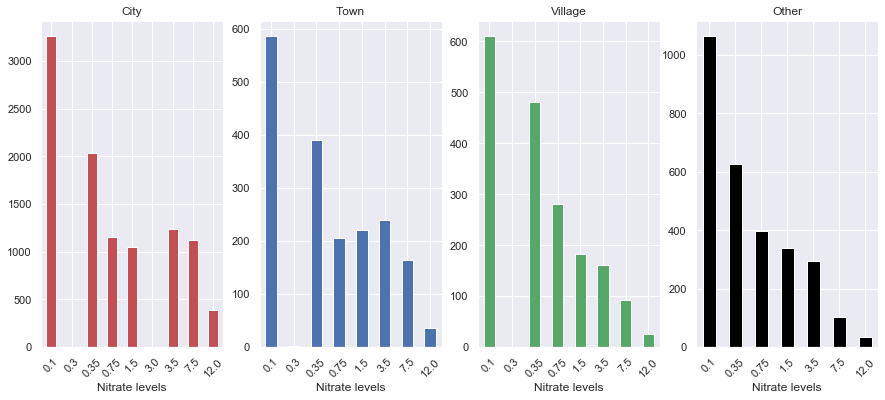

In [71]:
fig, ax = plt.subplots(ncols = 4, figsize = (15,6))

nitrate_func('city_proxy').sort_index().plot(kind = 'bar', ax = ax[0], rot = 45, title = 'City', color = 'r')
nitrate_func('town_proxy').sort_index().plot(kind = 'bar', ax = ax[1], rot = 45, title = 'Town', color = 'b')
nitrate_func('village_proxy').sort_index().plot(kind = 'bar', ax = ax[2], rot = 45, title = 'Village', color = 'g')
nitrate_func('other_proxy').sort_index().plot(kind = 'bar', ax = ax[3], rot = 45, title = 'Other', color = 'black')
ax[0].set(xlabel='Nitrate levels')
ax[1].set(xlabel='Nitrate levels')
ax[2].set(xlabel='Nitrate levels')
ax[3].set(xlabel='Nitrate levels');

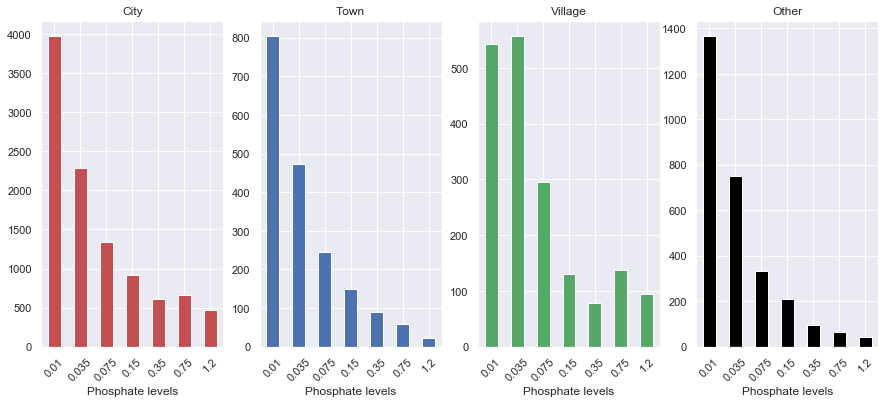

In [72]:
fig, ax = plt.subplots(ncols = 4, figsize = (15,6))

phosphate_func('city_proxy').sort_index().plot(kind = 'bar', ax = ax[0], rot = 45, title = 'City', color = 'r')
phosphate_func('town_proxy').sort_index().plot(kind = 'bar', ax = ax[1], rot = 45, title = 'Town', color = 'b')
phosphate_func('village_proxy').sort_index().plot(kind = 'bar', ax = ax[2], rot = 45, title = 'Village', color = 'g')
phosphate_func('other_proxy').sort_index().plot(kind = 'bar', ax = ax[3], rot = 45, title = 'Other', color = 'black')
ax[0].set(xlabel='Phosphate levels')
ax[1].set(xlabel='Phosphate levels')
ax[2].set(xlabel='Phosphate levels')
ax[3].set(xlabel='Phosphate levels');

## Common characteristics

### high/ low nitrate levels
- worrying that both high and low levels have many common characteristics, again reason to show that my features simply don't explain enough

In [73]:
columns = ['site_name', 'fw_bodytype', 'land_use', 'water_flow', 'water_level', 'continent', 'country']
for column in df[columns]:
    high = df[df['nitrate'] > 0.5][column].mode()
    low = df[df['nitrate']<0.5][column].mode()
    print('HIGH', column, ':', high[0])
    print('LOW', column, ':', low[0])
    print('----')

HIGH site_name : River Beam
LOW site_name : Hookhamslade Pond
----
HIGH fw_bodytype : River
LOW fw_bodytype : River
----
HIGH land_use : Urban Residential
LOW land_use : Urban Residential
----
HIGH water_flow : Steady
LOW water_flow : Still
----
HIGH water_level : Average
LOW water_level : Average
----
HIGH continent : Europe
LOW continent : Asia
----
HIGH country : United Kingdom
LOW country : United Kingdom
----


### high/ low phosphate levels
- same as nitrate

In [74]:
columns = ['site_name', 'fw_bodytype', 'land_use', 'water_flow', 'water_level', 'continent', 'country']
for column in df[columns]:
    high = df[df['phosphate'] > 0.5][column].mode()
    low = df[df['phosphate']<0.5][column].mode()
    print('HIGH', column, ':', high[0])
    print('LOW', column, ':', low[0])
    print('----')

HIGH site_name : mula mutha bird sanctuary site III
LOW site_name : Nona Bheri
----
HIGH fw_bodytype : River
LOW fw_bodytype : River
----
HIGH land_use : Urban Residential
LOW land_use : Urban Residential
----
HIGH water_flow : Slow
LOW water_flow : Steady
----
HIGH water_level : Average
LOW water_level : Average
----
HIGH continent : Asia
LOW continent : Europe
----
HIGH country : India
LOW country : United Kingdom
----
